# Protein Synthesis Simulation

Load dataset:

In [34]:
from HumanGenomeDataset.load_dataset import load_dataset

data_df = load_dataset('dna_protein_coding_sequences')
data_df.head(2)

ID                                           sequence category
0  NM_001368254.1  GCTGAGCTGAGCTGGGGCGCAGCCGCCTGTCTGCACCGGCAGCACC...       NM
1  NM_001350977.1  TCCACAACTGAAACATCCACTTCTGAACACCATGTCCTACTACAGC...       NM

### Simulation

In [35]:
from src.simulation import ProteinSinthesisProcess

In [36]:
import random
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Simulation parameters
SIM_TIME = 3600*12 # 12 hours
NUMBER_RESOURCES = 1e+4
NUMBER_RNA_POLYMERASES = 200
NUMBER_RIBOSOMES = 50
NUMBER_RNA_TRANSFER = 800
URACIL_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
ADENINE_INITIAL_AMOUNT = random.randint(4e+4, 6e+4)
GUANINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)
CYTOSINE_INITIAL_AMOUNT = random.randint(3e+4, 5e+4)

In [37]:
protein_synthesis_process = ProteinSinthesisProcess(
    dna_sequences_df=data_df,
    number_resources=NUMBER_RESOURCES,
    number_rna_polymerases=NUMBER_RNA_POLYMERASES, 
    number_ribosomes=NUMBER_RIBOSOMES,
    number_rna_transfers_per_codon=NUMBER_RNA_TRANSFER,
    uracil_initial_amount=URACIL_INITIAL_AMOUNT,
    adenine_initial_amount=ADENINE_INITIAL_AMOUNT,
    guanine_initial_amount=GUANINE_INITIAL_AMOUNT,
    cytosine_initial_amount=CYTOSINE_INITIAL_AMOUNT,
    random_seed=RANDOM_SEED,
    verbose=True
    )

Simulation environment initialized, time unit: 0.0001 second.


In [38]:
print(protein_synthesis_process)

Protein Sinthesis Process:
185310 dna sequences to synthesize,
10000.0 resources available,
80 RNA polymerases,
10 ribosomes,
33648 uracil bases,
40819 adenine bases,
39012 guanine bases,
38024 cytosine bases.


In [39]:
print(repr(protein_synthesis_process))

Protein Sinthesis Process:
185310 dna sequences to synthesize,
10000.0 resources available,
80 RNA polymerases,
10 ribosomes,
33648 uracil bases,
40819 adenine bases,
39012 guanine bases,
38024 cytosine bases,
748 transfer RNA for UUU codon,
726 transfer RNA for UCU codon,
790 transfer RNA for UAU codon,
782 transfer RNA for UGU codon,
777 transfer RNA for UUC codon,
755 transfer RNA for UCC codon,
746 transfer RNA for UAC codon,
859 transfer RNA for UGC codon,
742 transfer RNA for UUA codon,
871 transfer RNA for UCA codon,
828 transfer RNA for UAA codon,
728 transfer RNA for UGA codon,
727 transfer RNA for UUG codon,
743 transfer RNA for UCG codon,
775 transfer RNA for UAG codon,
779 transfer RNA for UGG codon,
849 transfer RNA for CUU codon,
874 transfer RNA for CCU codon,
726 transfer RNA for CAU codon,
863 transfer RNA for CGU codon,
770 transfer RNA for CUC codon,
859 transfer RNA for CCC codon,
827 transfer RNA for CAC codon,
776 transfer RNA for CGC codon,
834 transfer RNA for C

Start simulation:

In [40]:
protein_synthesis_process.run(simulation_time=SIM_TIME) # run the simulation

Simulation started
Time 0.0000: DNA Sequence 0 requesting to start synthesis
Time 0.0000: DNA Sequence 0 synthesize started
Time 0.0000: DNA Sequence 0 start transcription process
Time 0.0000: DNA Sequence 0 contains 6 promoters
Time 0.0000: DNA Sequence 0 (mRNA sequence 0) start transcription process
Time 5.5666: DNA Sequence 1 requesting to start synthesis
Time 5.5666: DNA Sequence 1 synthesize started
Time 5.5666: DNA Sequence 1 start transcription process
Time 5.5666: DNA Sequence 1 contains 1 promoters
Time 5.5666: DNA Sequence 1 (mRNA sequence 0) start transcription process
Time 10.0300: DNA Sequence 0 start translation process
Time 10.0300: DNA Sequence 0 (mRNA sequence 0) start translation process
Time 26.1489: DNA Sequence 2 requesting to start synthesis
Time 26.1489: DNA Sequence 2 synthesize started
Time 26.1489: DNA Sequence 2 start transcription process
Time 26.1489: DNA Sequence 2 contains 1 promoters
Time 26.1489: DNA Sequence 2 (mRNA sequence 0) start transcription proc

In [41]:
TEST_NAME='test'
protein_synthesis_process.save_process(folder_test_name=TEST_NAME) # save the process

Process saved.


### Results

In [42]:
import pandas as pd
results_path = 'results/'+TEST_NAME+'/results.csv'

results_df = pd.read_csv(results_path, index_col=0)

In [43]:
print('Number of DNA sequence traslated:', results_df[results_df['mrna_sequences'].notna()].shape[0])
print('Number of DNA sequence not traslated:', results_df[results_df['protein_synthesized']==False].shape[0])

Number of DNA sequence traslated: 1601
Number of DNA sequence not traslated: 110


In [44]:
results_df[results_df['mrna_sequences'].notna()][[
    'polypeptides_chains', 'number_of_proteins_synthesized', 'number_of_proteins_synthesized_per_mrna', 
    'length_proteins', 'number_different_proteins']].head()

polypeptides_chains  \
56   ['NH2-RFFIRYYTKDFLALDKLLYWVSRRVFLSRPFILYPTLFFY...   
91   ['NH2-TTTLLSRTVSFLLVSGRDPMRSLRHTGTITSVGSSQTIPP...   
190  ['NH2-TTTLLSRTVSFILVSGRDPMRSLRHTGTITSVGSSQTIPP...   
418           ['NH2-DSGSLEVLRVNKVRKVVENTCVWTSET-COOH']   
494                       ['NH2-SVCLREGRNWGTGKN-COOH']   

     number_of_proteins_synthesized number_of_proteins_synthesized_per_mrna  \
56                               14                               [8, 4, 2]   
91                               18                               [4, 5, 9]   
190                               7                               [1, 3, 3]   
418                               5                                     [5]   
494                              10                                    [10]   

    length_proteins  number_different_proteins  
56     [112, 7, 47]                        3.0  
91    [117, 19, 42]                        3.0  
190   [117, 19, 42]                        3.0  
418            [27]                        1.0  
494            [15]                        1.0

In [45]:
results_df[results_df['mrna_sequences'].notna()][
    ['request_start_process_time', 'start_process_time', 'end_process_time',
    'number_different_proteins', 'number_of_proteins_synthesized']
    ].describe()

request_start_process_time  start_process_time  end_process_time  \
count                 1601.000000         1601.000000       1601.000000   
mean                 21219.306716        21219.306716      21571.134148   
std                  12388.860560        12388.860560      12441.007315   
min                      0.000000            0.000000        143.624300   
25%                  10437.333700        10437.333700      10799.359900   
50%                  21304.134500        21304.134500      21749.336600   
75%                  31769.091500        31769.091500      32165.793000   
max                  43094.384300        43094.384300      43181.650500   

       number_different_proteins  number_of_proteins_synthesized  
count                1601.000000                     1601.000000  
mean                    2.358526                       15.456590  
std                     2.324893                       17.491913  
min                     0.000000                        1.000000  
25%                     1.000000                        5.000000  
50%                     2.000000                       10.000000  
75%                     3.000000                       19.000000  
max                    34.000000                      183.000000

### Protein Length

In [46]:
from src.utils.plot_utils import *

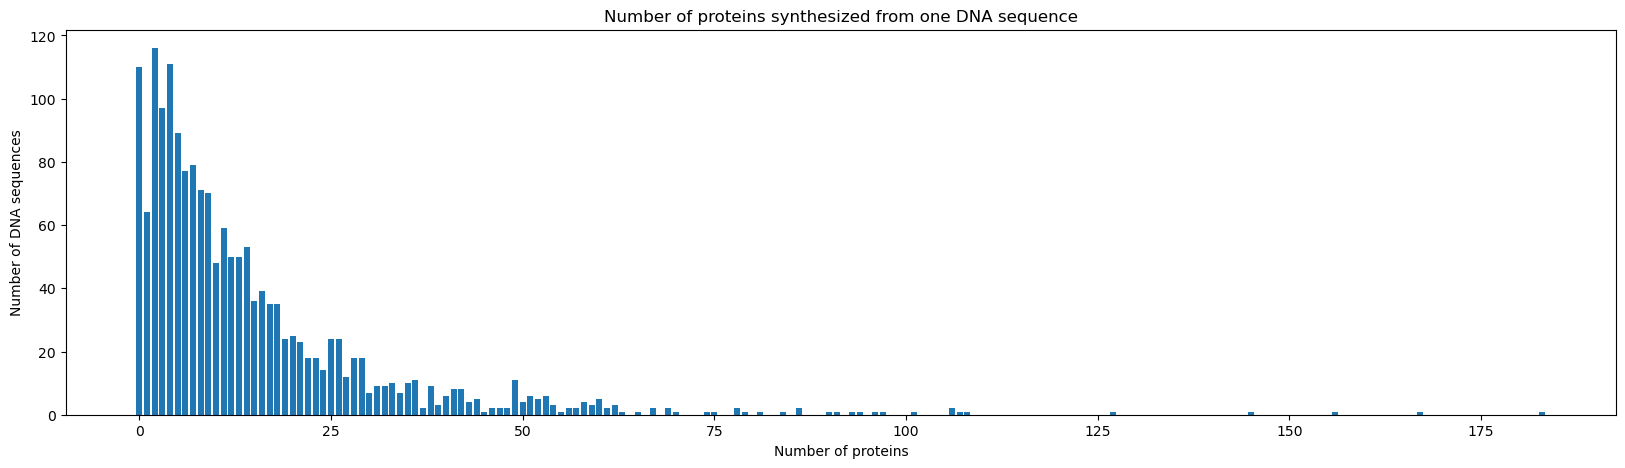

In [47]:
barplot_proteins_number(results_df)

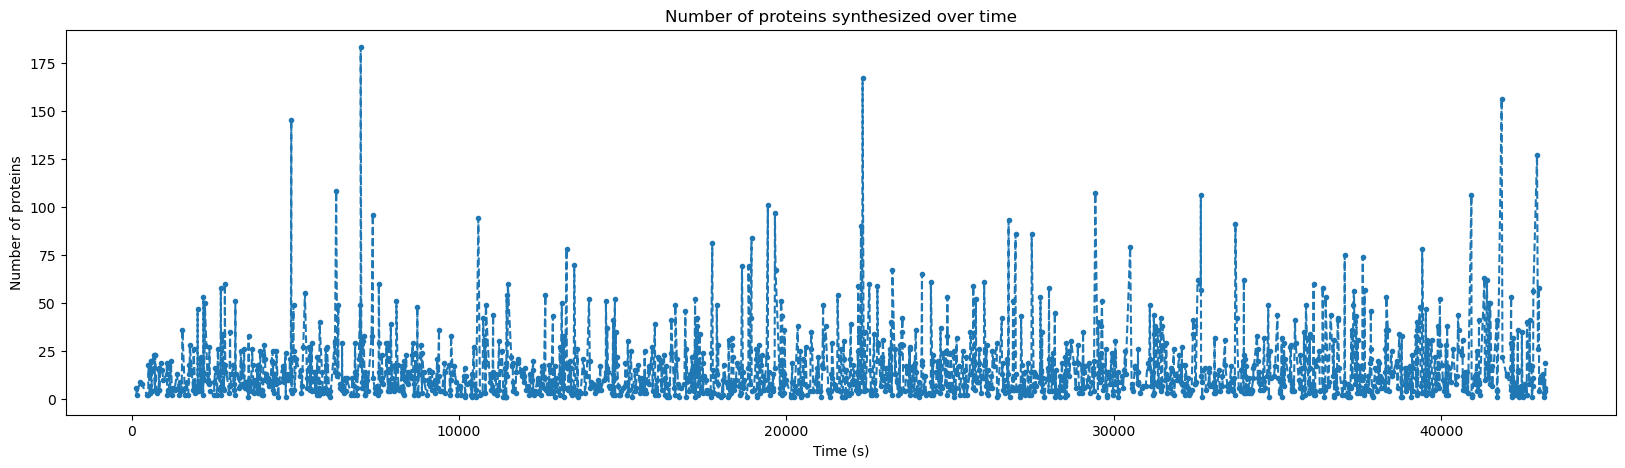

In [48]:
plot_proteins_number_over_time(results_df)

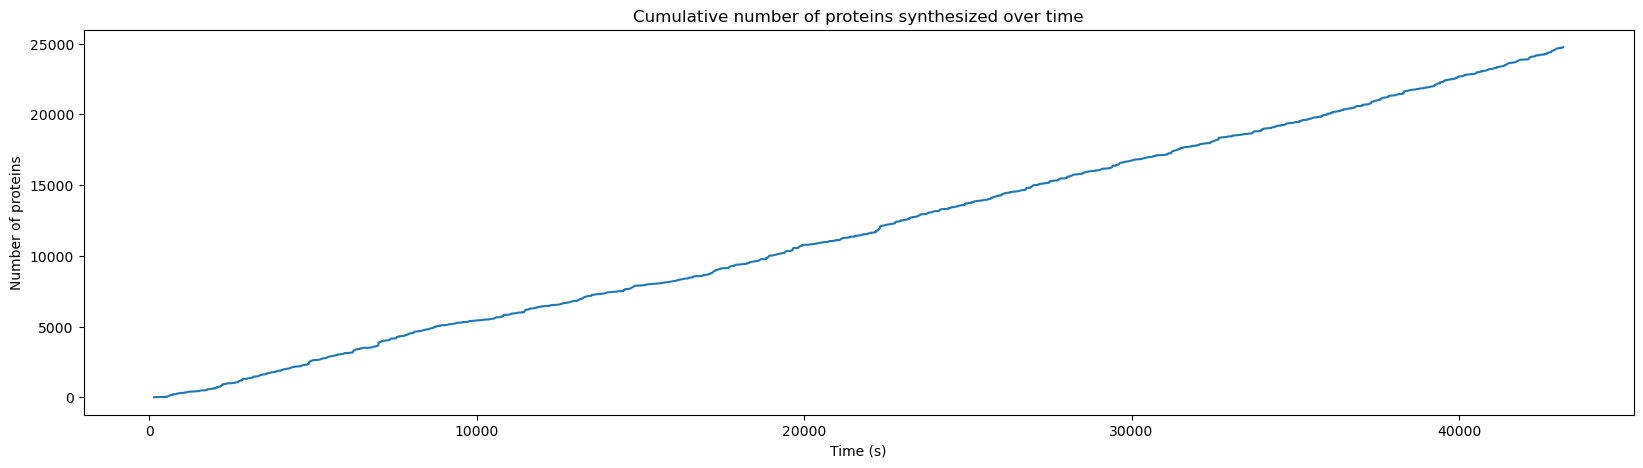

In [49]:
plot_cumulative_proteins_number_over_time(results_df)

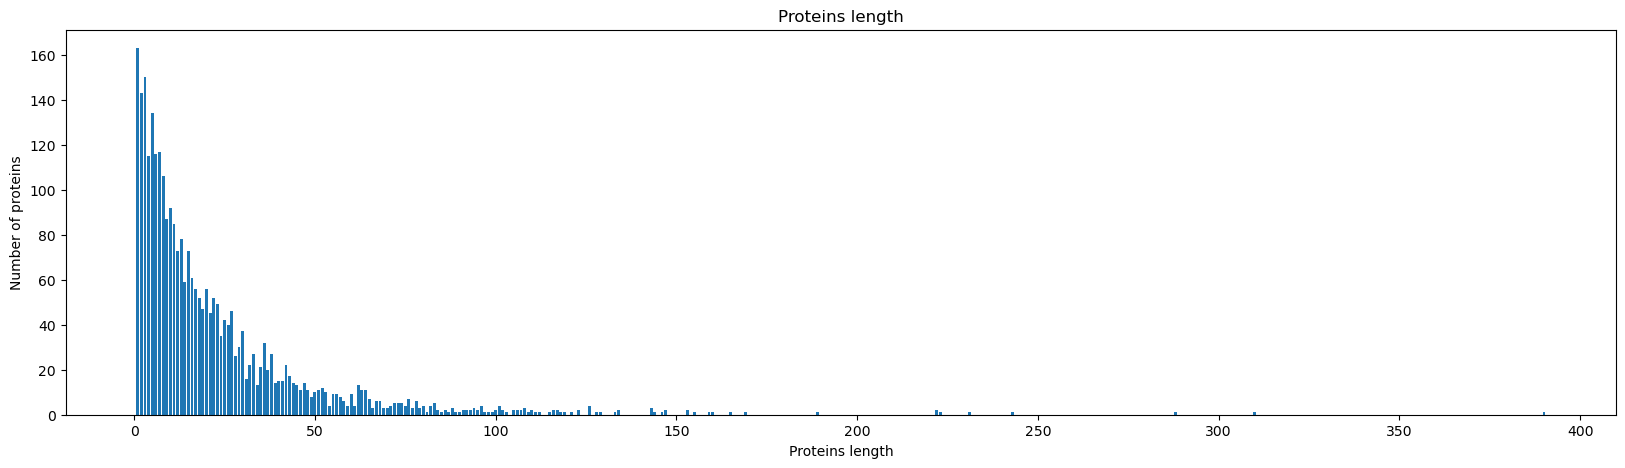

In [50]:
barplot_proteins_length(results_df)

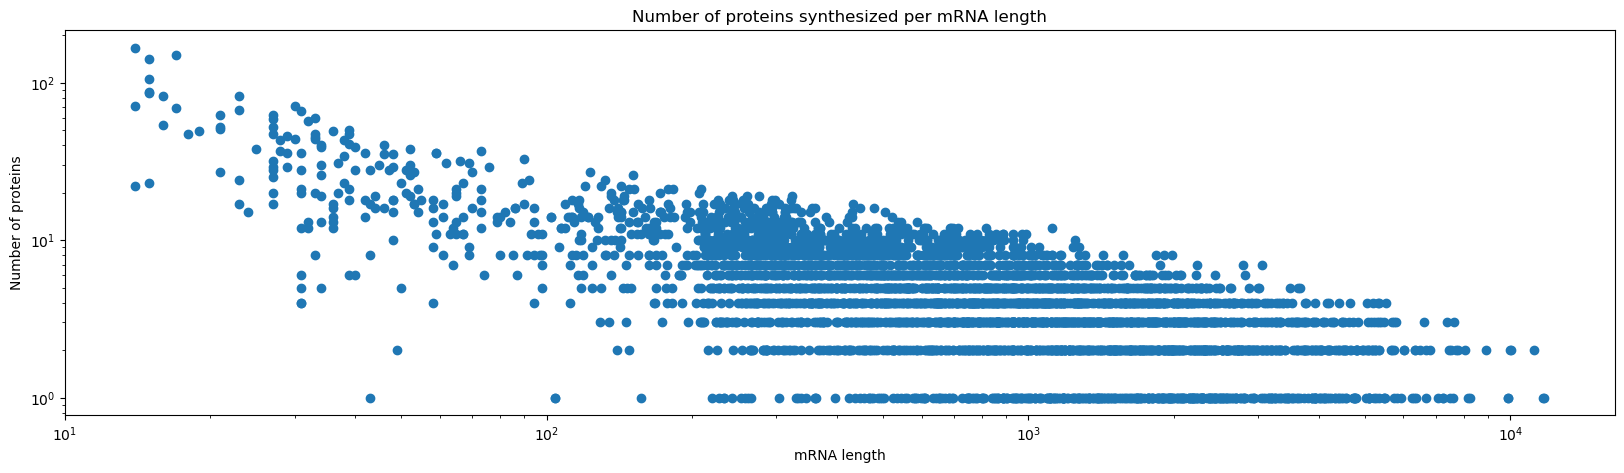

In [51]:
plot_number_proteins_per_length_mrna(results_df)

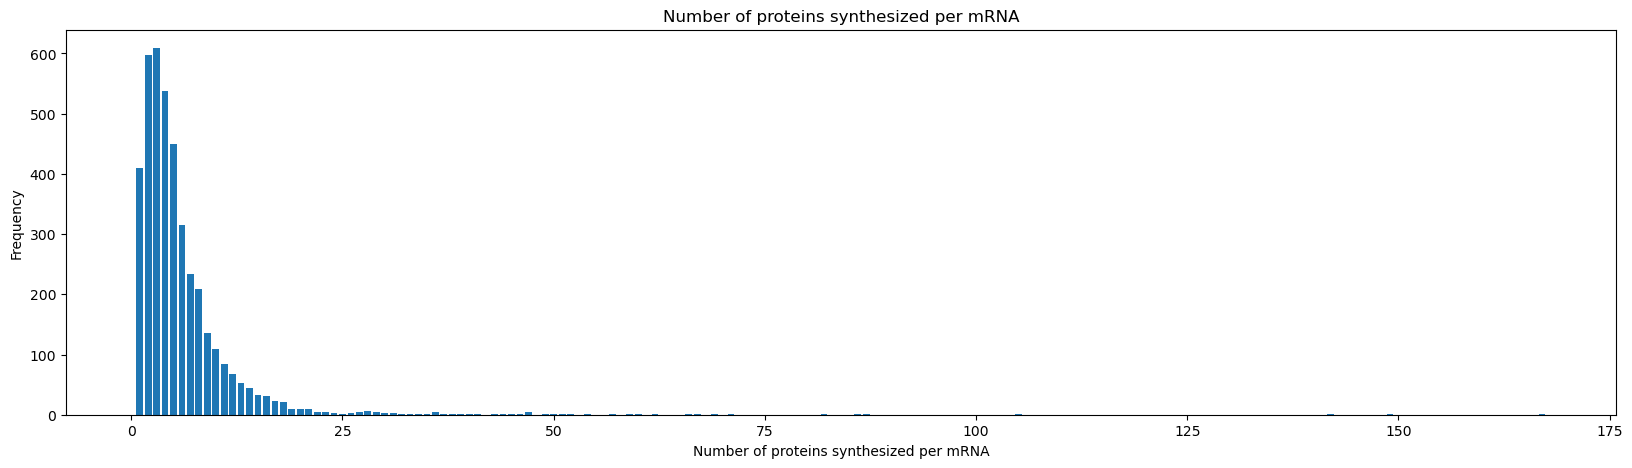

In [52]:
barplot_number_proteins_per_mrna(results_df)

### Process time

Whole process:

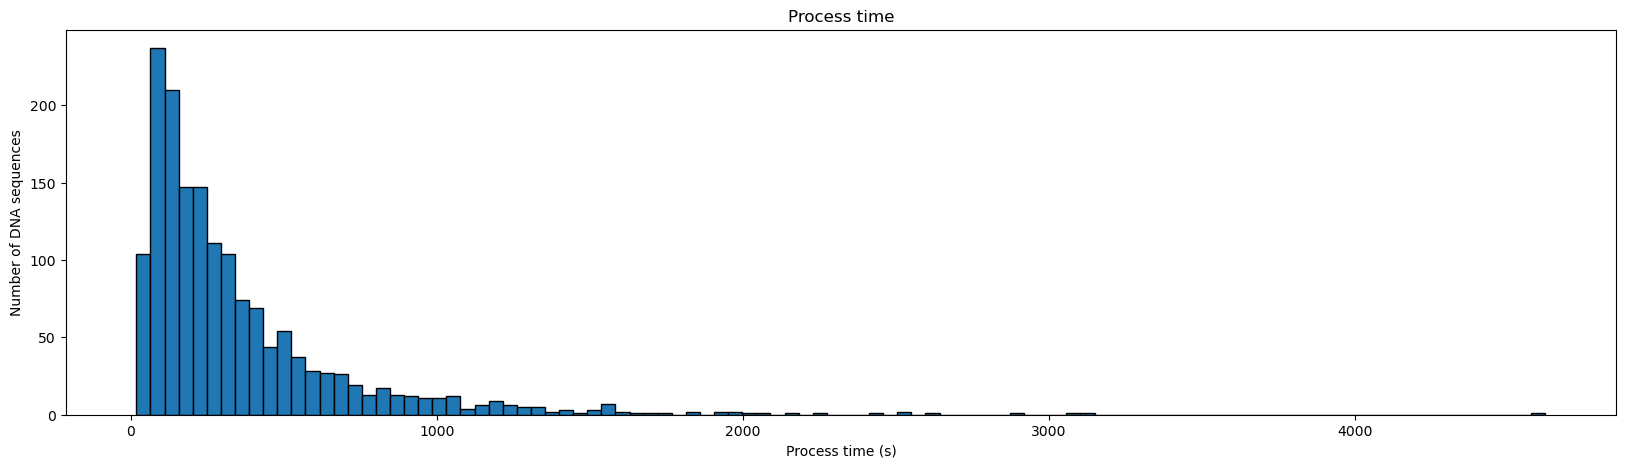

In [53]:
hist_process_time(results_df)

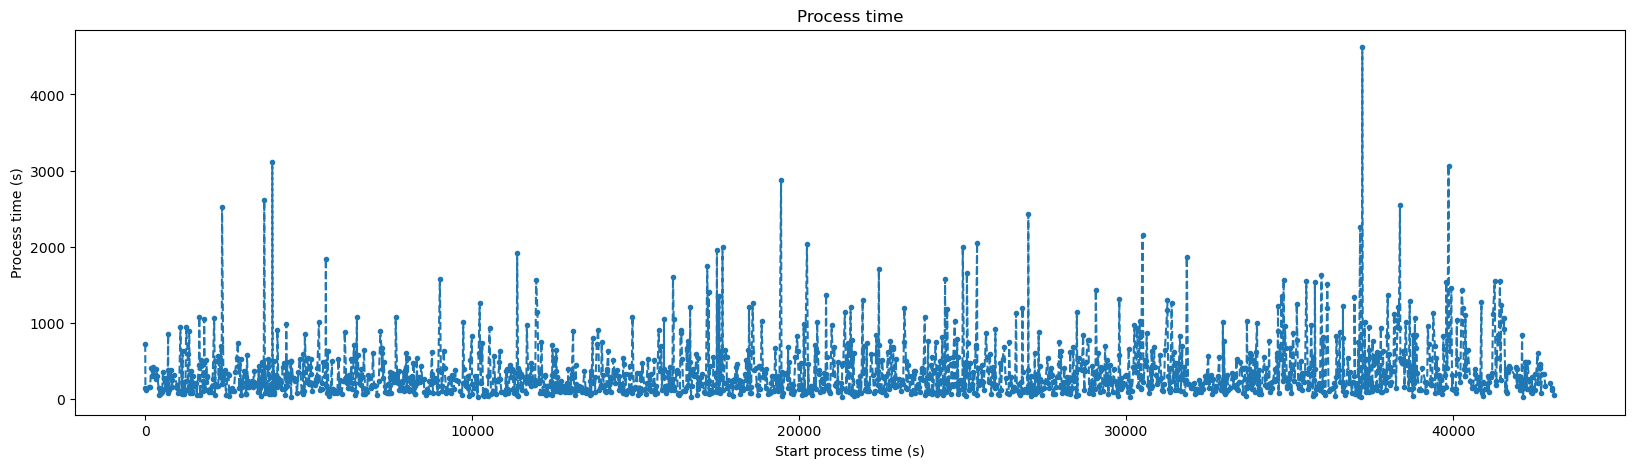

In [54]:
plot_process_time(results_df)

mRNA lifetime:

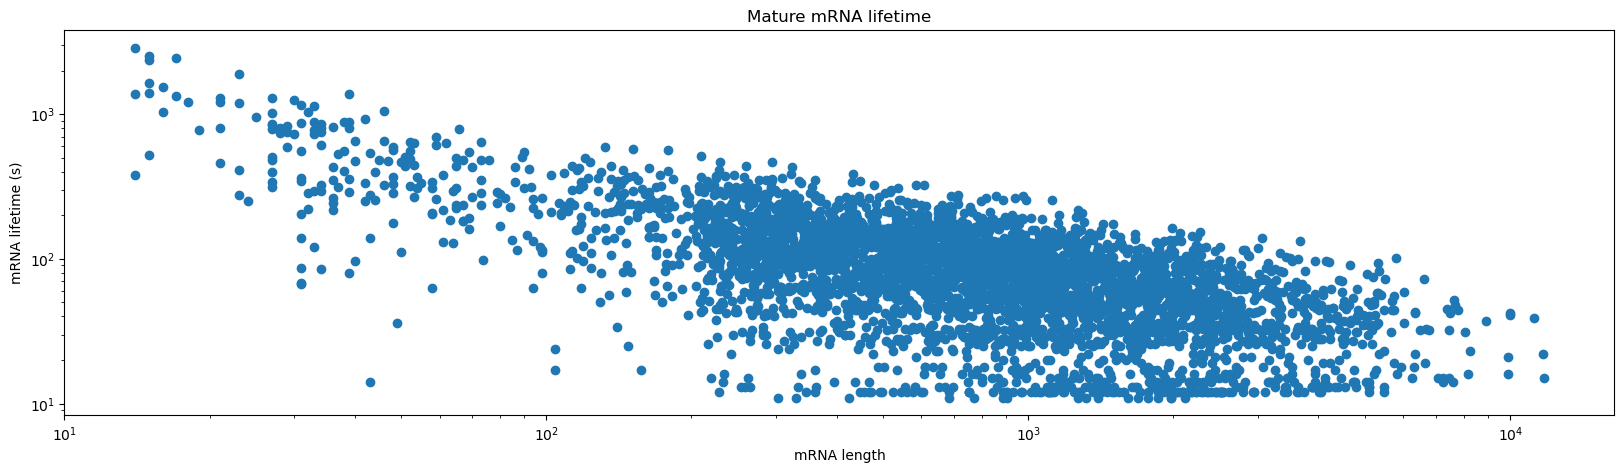

In [55]:
plot_mrna_lifetime(results_df)

### Nucleotides Level

In [56]:
import json

with open('results/test/nucleotides/nucleotides_history_uracil.json') as f:
    uracil_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_adenine.json') as f:
    adenine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_guanine.json') as f:
    guanine_dict = json.load(f)

with open('results/test/nucleotides/nucleotides_history_cytosine.json') as f:
    cytosine_dict = json.load(f)

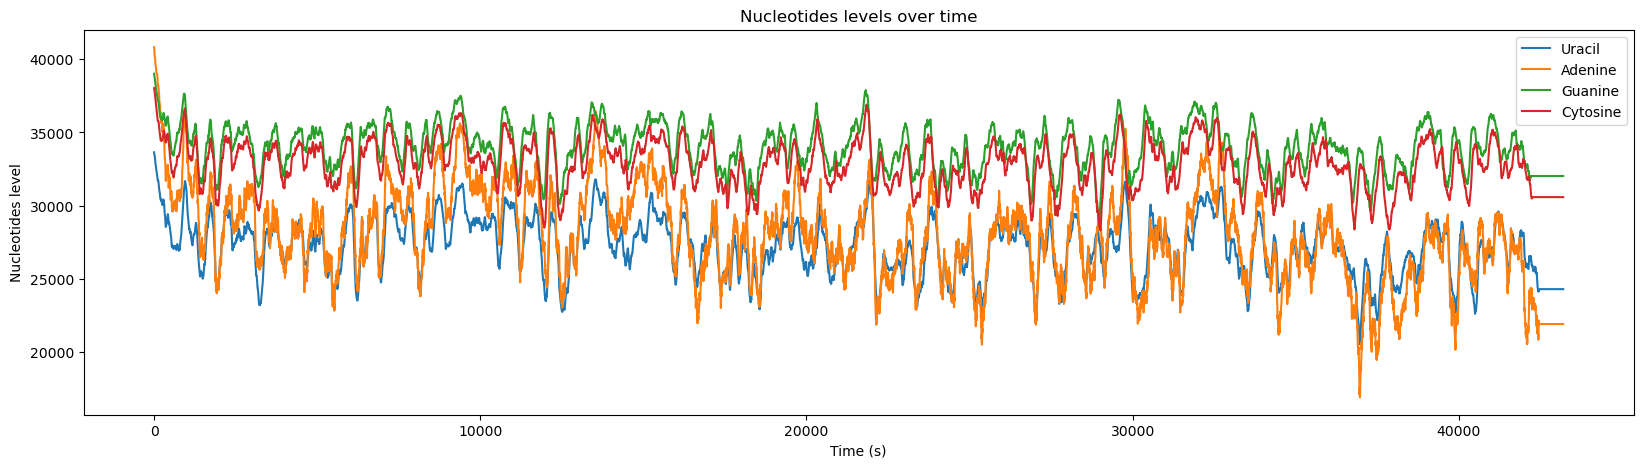

In [57]:
plot_nucleotide_level_over_time(uracil_dict, adenine_dict, guanine_dict, cytosine_dict, time_unit=1)

### RNA Polymerase

In [58]:
with open('results/'+TEST_NAME+'/rna_polymerase_history.json') as f:
    rna_polymerase_dict = json.load(f)

In [59]:
rna_polymerase_df = dict_to_dataframe(rna_polymerase_dict)

In [60]:
rna_polymerase_df.describe() # values in seconds

queue  request_time  available_time  wait_time      end_time  \
count  4156.0   4156.000000     4156.000000     4156.0   4156.000000   
mean      0.0  22111.154737    22111.154737        0.0  22134.909872   
std       0.0  12425.586898    12425.586898        0.0  12425.298480   
min       0.0      0.000000        0.000000        0.0     10.030000   
25%       0.0  11439.187650    11439.187650        0.0  11451.502425   
50%       0.0  22828.121800    22828.121800        0.0  22846.717550   
75%       0.0  32781.372875    32781.372875        0.0  32807.799200   
max       0.0  43174.856900    43174.856900        0.0  43197.651700   

        usage_time  
count  4156.000000  
mean      7.391691  
std       6.417508  
min       0.001900  
25%       2.550000  
50%       5.850000  
75%      10.271425  
max      45.910000

### Ribosome

In [61]:
with open('results/'+TEST_NAME+'/ribosome_history.json') as f:
    ribosome_dict = json.load(f)

In [62]:
ribosome_df = dict_to_dataframe(ribosome_dict)

In [63]:
ribosome_df.describe()

queue  request_time  available_time     wait_time      end_time  \
count  32342.000000  32342.000000    32342.000000  32342.000000  32342.000000   
mean       2.552223  22746.461365    22749.203427      0.606877  22760.966298   
std        3.304428  12341.059546    12343.299584      0.912365  12343.283149   
min        0.000000     10.030000       10.030000      0.000000     21.515000   
25%        0.000000  12218.790925    12218.790925      0.000000  12230.511075   
50%        1.000000  23143.128600    23144.480250      0.134950  23158.073850   
75%        4.000000  33593.921975    33593.921975      0.933575  33605.530875   
max       19.000000  43176.559300    43186.361700      7.131700  43198.801000   

         usage_time  
count  3.234200e+04  
mean   1.264275e+00  
std    1.139356e+00  
min    1.899025e-09  
25%    4.133000e-01  
50%    9.564000e-01  
75%    1.799625e+00  
max    1.201000e+01

Resources request wait time:

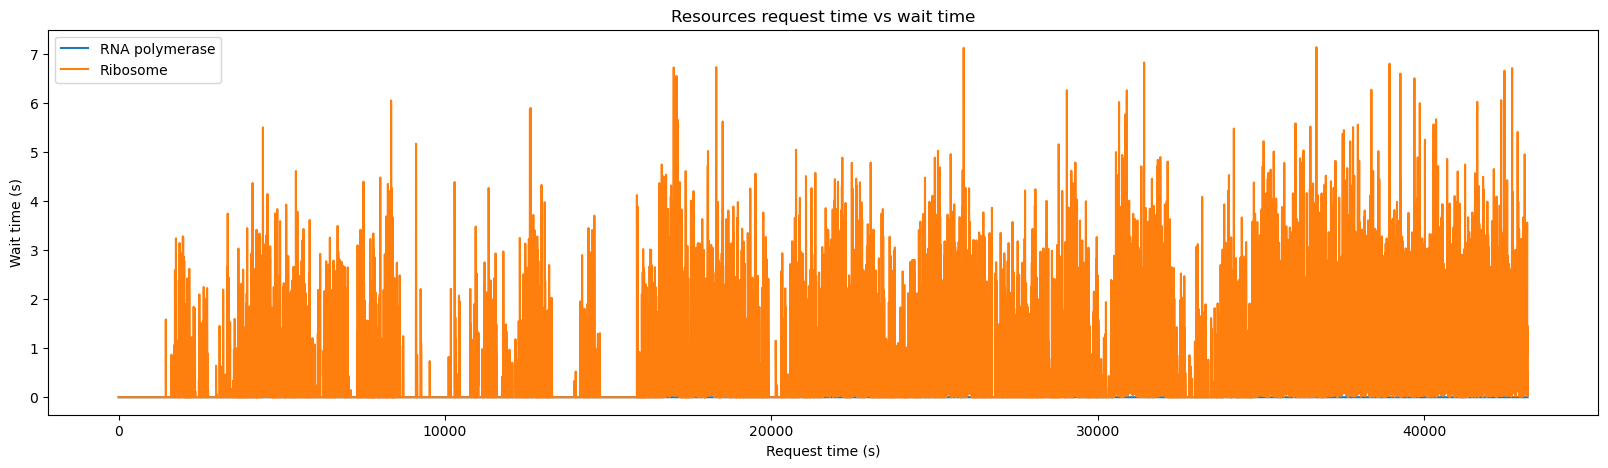

In [64]:
resources_request_wait_time(rna_polymerase_df, ribosome_df)

### Transfer RNA

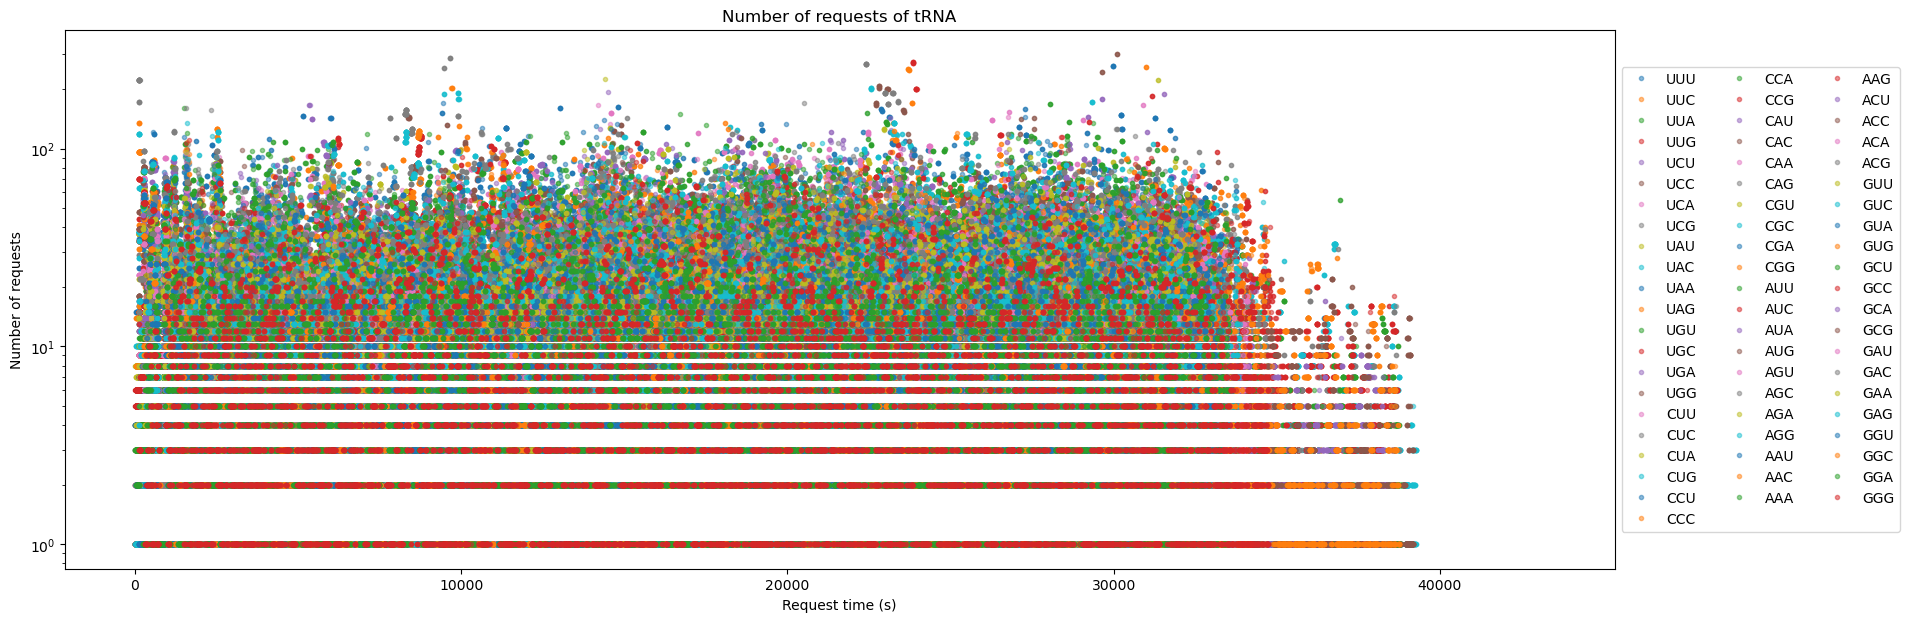

In [65]:
plot_codons_request(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)

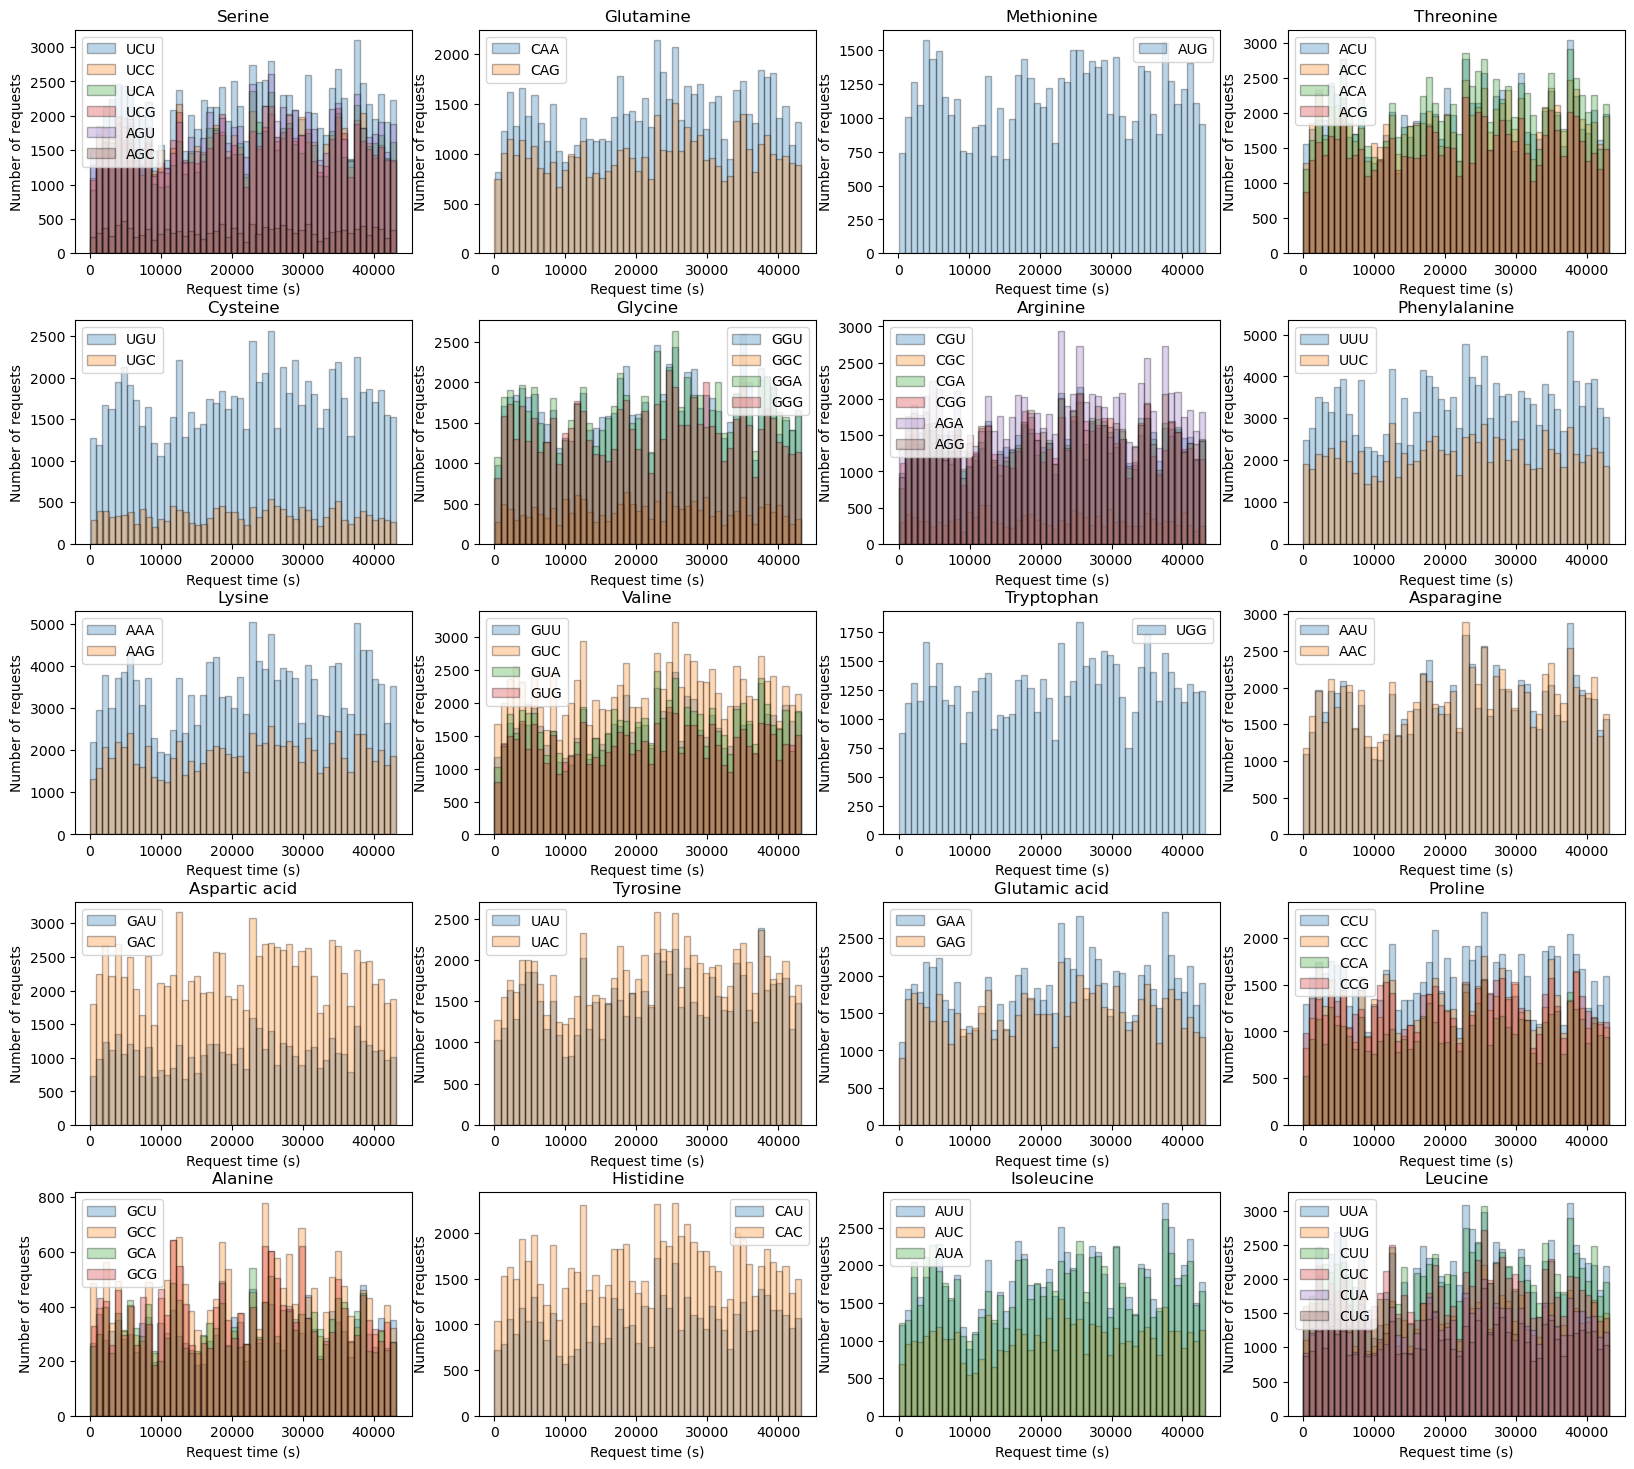

In [66]:
plot_codons_request_per_aminoacid(file_path='results/'+TEST_NAME+'/rna_transfer/', time_unit=1)